# Week 7 - Parameters of Boosting

공모전을 준비하는 도중, lightGBM과 XGBoost의 파라미터에 대한 지식이 부족하다는 것을 깨닫고 준비하였습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats
sns.set_style('darkgrid')

import lightgbm as lgb

### Parameter (파라미터)

: 매개 변수라고 하며, 모델 내부에서 결정되는 변수이며, 이 값은 데이터 내부에서 결정됨.

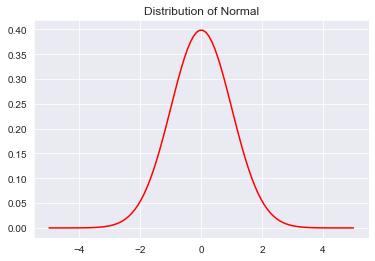

In [2]:
# 정규분포
x = np.linspace(-5,5,100)
y = stats.norm(0, 1).pdf(x)
plt.plot(x, y, color = 'red')
plt.grid('darkgrid')
plt.title('Distribution of Normal')
plt.show()

표준정규분포는 평균(mean)과 표준편차(sigma)에 따라 그려집니다. 이때 평균(mean)과 표준편차(sigma)가 파라미터가 되는 것입니다. 

이처럼 파라미터는 데이터 안에서 구해지며, 모델 내부적으로 결정됩니다.

### Hyper Paramter (하이퍼 파라미터)

: 하이퍼 파라미터는 모델링을 할 때, 사용자가 직접 설정해주는 값을 의미합니다. 

대표적으로는 learing rate, KNN 알고리즘의 K 값 등이 있습니다. 

하이퍼 파라미터는 모델링을 할 때, 많은 영향을 끼치므로 최적화된 방법으로 설정해주어야 좋은 결과를 도출 할 수 있습니다.

최적화 방법은 직접 세팅해보는 휴리스틱한 방법과 Grid Search, Random Search와 같은 패키지를 사용하여 설정하는 방법 등이 있습니다.

다음은 모델링에 많은 영향을 주는 하이퍼 파라미터에 대한 내용입니다.

## LGBM, XGBOOST의 Hyperparameter

### 1. learing rate  / eta (학습률)

<b> Cost Function (비용 함수) </b> 

In [3]:
# Boston
dataset = datasets.load_boston()

boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston['target'] = dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- RM : 주택 1가구당 평균 방의 개수
- target : 주택 가격

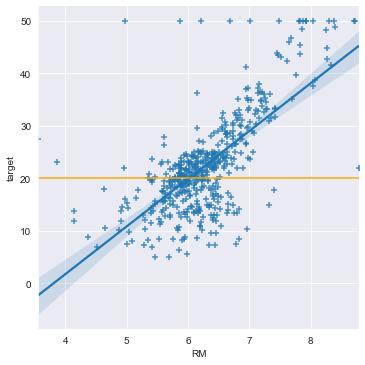

In [4]:
# Linear Regression
sns.lmplot(x = 'RM', y = 'target', data = boston, markers= '+')
plt.axhline(y = 20, color = 'orange')
plt.show()

위 그래프는 RM(주택 1 가구당 평균 방의 개수)를 통해 target(주택 가격)을 예측하는 회귀직선 그래프입니다.

산점도를 보면 평균 방의 개수가 많을수록 주택의 가격 또한 상승하는 추세가 보입니다.

파란 회귀직선도 잘 적합된 것으로 보인지만 오렌지 회귀직선은 데이터에 맞게 적합되지 않았습니다.

최적의 회귀직선을 찾는 방법은 오차(error)의 제곱의 평균(MSE)을 최소로 하는 방법입니다.

<b> 이해를 돕기 위한 그림 </b>

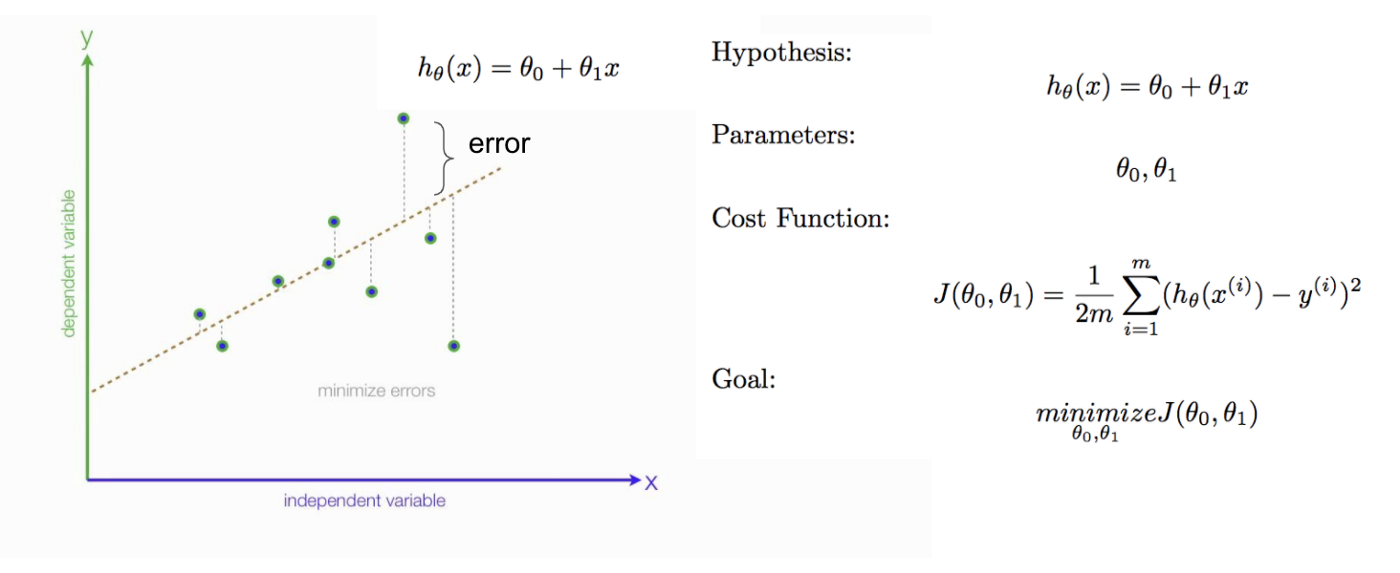

h(x)는  일반적인 1차 함수이고, 파라미터는 기울기와 절편입니다. 이때 Cost Function은 위와 같고,1/2m을 해준 이유는 최소제곱법에서 미분을 쉽게 하기 위함입니다.

다음은  Gradient Descent라는 방식을 통해 Cost Funtion을 최소화 하는 방식입니다.

<b> Gradient Descent (경사하강법) </b>

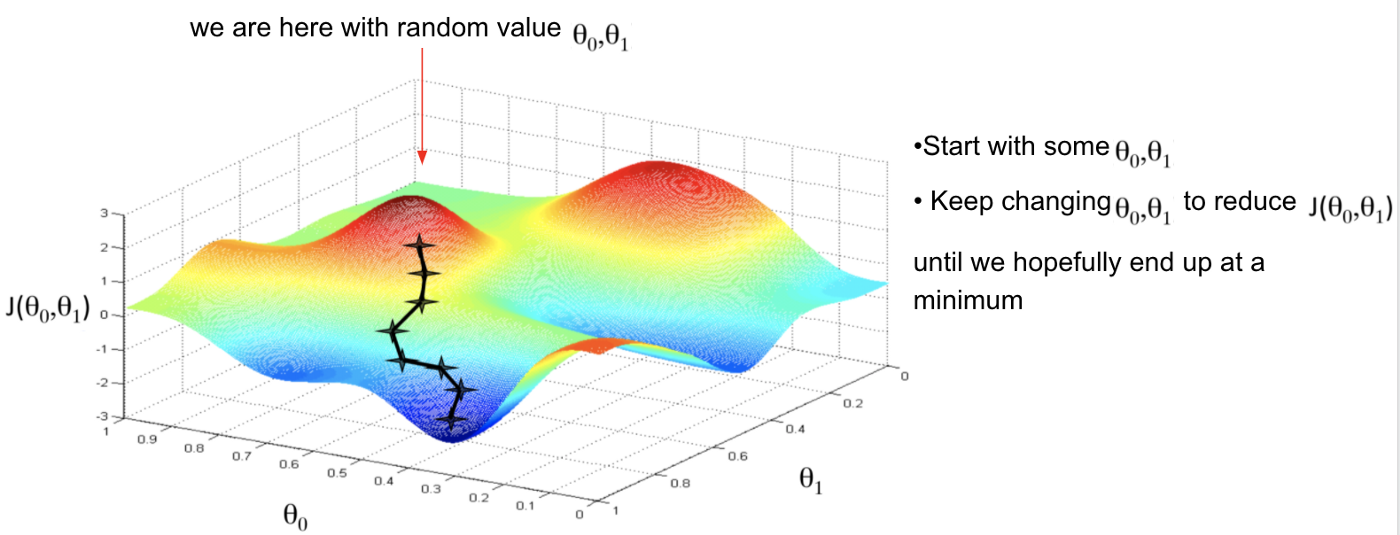

Gradient Descent는 미분을 사용해 임의의 초기값에서 시작하여, 최소의 Cost Function을 갖는 점을 찾을 때까지 반복하는 방법입니다. 위 그림을 보면 빨간 언덕에서 시작 되어 점차 최소의 값을 갖는 파란 골짜기로 점이 이동하게 됩니다. 이처럼 Global Descent는 local or global minimum(지역 or 전역 극소점)을 찾기 좋은 방법입니다.

이때 각 점에서 점으로 이동하는 보폭의 크기를 결정하는 것이 learing rate(학습률)입니다.

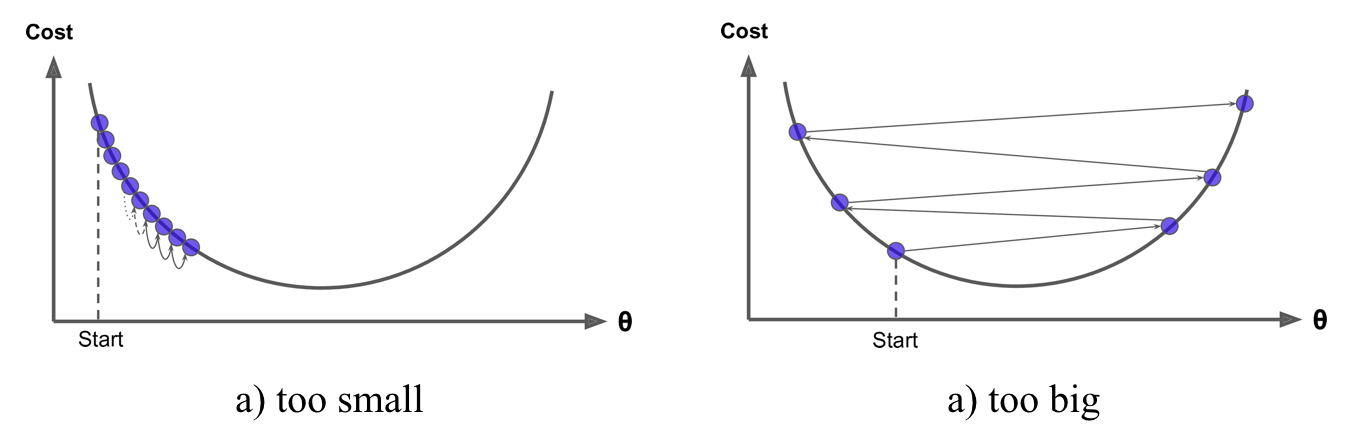

왼쪽의 그림처럼 learing rate를 매우 작게한다면, 보폭이 작아지기 때문에 local or global minum으로 가는 시간이 오래 걸리게 되어 가지 못할 수도 있습니다. 

이와 반대로 오른쪽 그림처럼 learning rate가 매우 커지게 된다면 보폭의 크기가 크기 때문에 local or global minimum으로 가지 못하게 됩니다. 

따라서 적절한 learning rate를 설정해주는 것이 중요합니다. (default : 0.1)

### 2. n_estimator (반복 수)

tree를 반복하여 부스팅하는 횟수를 정해주는 것이다. 1000회 이상은 해주는 것이 좋으며 너무 많이 반복하게 되면 overfitting 됩니다.

### 3. early_stopping_round /  early_stopping_rounds (조기 멈춤)

tree를 너무 많이 반복하게 되면 overfitting 되므로 좋지 않다고 했지만 early_stopping을 설정해준다면 괜찮습니다. 

예를 들어 early_stopping_round를 100회로 설정하였을 때, 100회 이상 실시하여도 발전이 없다면 반복을 중지하게 됩니다.

### 4. max_depth (나무 깊이)

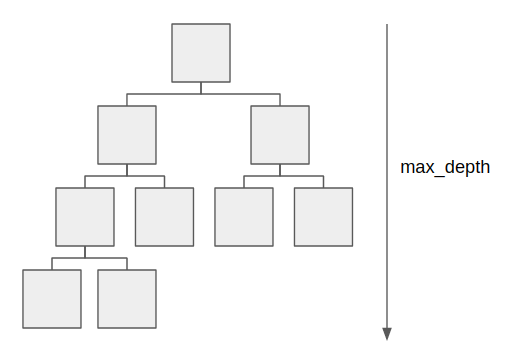

feature가 많은 경우엔 tree의 깊이를 더욱 깊게 해준다. default는 -1로 깊이를 제한 없이 설정하는 것이다.

### 5. feature_fraction / colsample_bytree (열 샘플링)

컬럼(feature)을 샘플링하여 다양성을 높이는 방법이다. default는 1이고, 일반적으로 0.7 ~ 0.9 사이로 세팅한다.

### 6. metric / loss

모델링시 평가 방법에 맞게 설정을 해줘야합니다. 아래는 lightGBM에서 제공하는 평가 방식들입니다.

- binary(Cross Entropy)
- multiclass(Cross Entropy)
- regression_l2(MSE)
- regression_l1 (MAE)
- mape (MAPE)
- poisson (Log Transformation)
- quantile (Quantile)
- huber (Huber loss, MAE approx)
- fair (Fair loss, MAE approx)
- gamma (Residual Deviance)
- lambdarank
- tweedie

### Reference

- lgbm, xgboost 파라미터 : http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/
- 파라미터와 하이퍼 파라미터 : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-13-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0Parameter%EC%99%80-%ED%95%98%EC%9D%B4%ED%8D%BC-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0Hyper-parameter
- 5 Concept Gradient Descent : https://www.kdnuggets.com/2020/05/5-concepts-gradient-descent-cost-function.html
- Gradient Descent : https://mangkyu.tistory.com/34